In [120]:
# Dataset Preprocessing for CTU-13 netflows
#      dataset = get_dataset()
#      fix_labels(dataset)
#      print_flow_label_totals(dataset)
#      write_fixed_dataset(dataset)
#
#
# TODO:
#      - Write a function which includes paths to original datasets 
#        from each scenario in an array
#      - Then loop through the dataset reads and write each new fixed
#        dataset to a seperate folder

In [11]:
# Import Pandas library for DataFrame and related functions
#
#
# TODO:
#      - Have dataset path passed in as a string to automate dataset fixes
#      - e.g.    get_dataset(path):
#                    raw_dataset = pd.read_csv(path)
#
import pandas as pd

# Function to load dataset
def get_dataset():
    # Read in .csv file data
    try:
        raw_dataset = pd.read_csv("G:/USB Drive Files/Year 3/Semester 1/KV6003 - Individual Computing Project/Datasets/CTU-13/1/capture20110810.binetflow")
    except:
        print("File Read Error")

    # Put data into Pandas DataFrame
    dataset = pd.DataFrame(raw_dataset)
    
    # Return DataFrame
    return dataset

dataset = get_dataset()

File Read Error


UnboundLocalError: local variable 'raw_dataset' referenced before assignment

In [5]:
dataset.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt


In [2]:
# Function to get unique labels into an associative array
def get_unique_labels(dataset):
    unique_labels = {}
    rows = dataset.shape[0]
    
    for row in range(rows):
        label = dataset.at[row, 'Label']
        
        if label not in unique_labels:
            unique_labels.update({label : ""})
            
    return unique_labels


unique_labels = get_unique_labels(dataset)

print(unique_labels)

{'flow=Background-Established-cmpgw-CVUT': '', 'flow=Background-TCP-Attempt': '', 'flow=Background-TCP-Established': '', 'flow=Background-Attempt-cmpgw-CVUT': '', 'flow=To-Background-CVUT-Proxy': '', 'flow=Background-UDP-Established': '', 'flow=Background': '', 'flow=From-Background-CVUT-Proxy': '', 'flow=To-Background-UDP-CVUT-DNS-Server': '', 'flow=Background-UDP-Attempt': '', 'flow=From-Normal-V42-UDP-CVUT-DNS-Server': '', 'flow=Background-UDP-NTP-Established-1': '', 'flow=To-Background-CVUT-WebServer': '', 'flow=Background-google-analytics3': '', 'flow=Background-google-analytics2': '', 'flow=Background-google-analytics6': '', 'flow=From-Normal-V42-Jist': '', 'flow=Background-google-webmail': '', 'flow=Background-google-analytics12': '', 'flow=Background-google-analytics1': '', 'flow=Background-google-analytics13': '', 'flow=Background-google-analytics14': '', 'flow=To-Background-Jist': '', 'flow=Background-ajax.google': '', 'flow=From-Normal-V42-Grill': '', 'flow=Background-google

In [6]:
# Function to modify dataset DataFrame Label descriptions
def fix_labels(dataset):
    # Iterate over each column
    for i in range(dataset.shape[0]):
        label = dataset.at[i, 'Label']
        
        if "Background" in label:
            dataset.at[i, 'Label'] = "Background"
        elif "Normal" in label:
            dataset.at[i, 'Label'] = "Normal"
        elif "Botnet" in label:
            dataset.at[i, 'Label'] = "Botnet"
            
            
fix_labels(dataset)

dataset.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Background
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Background
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background


In [7]:
# Prints total number of botnet records
def print_flow_label_totals(dataset):
    background_flows = 0
    normal_flows = 0
    botnet_flows = 0
    
    for row in range(dataset.shape[0]):    
        if dataset.at[row, 'Label'] == "Background":
            background_flows += 1
        if dataset.at[row, 'Label'] == "Normal":
            normal_flows += 1
        if dataset.at[row, 'Label'] == "Botnet":
            botnet_flows += 1
        
    print('Background flows = ', background_flows)
    print('Normal flows = ', normal_flows)
    print('Botnet flows = ', botnet_flows)
    
print_flow_label_totals(dataset)

Background flows =  2753288
Normal flows =  30387
Botnet flows =  40961


In [8]:
dataset.head(1311063)

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Background
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Background
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
5,2011/08/10 09:47:58.806814,3.097288,tcp,147.32.86.89,4866,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Background
6,2011/08/10 09:51:34.450457,1.048908,tcp,213.200.244.217,47908,->,147.32.84.59,6881,S_RA,0.0,0.0,4,244,124,Background
7,2011/08/10 09:54:55.231320,4.373526,tcp,75.105.28.60,1419,->,147.32.84.59,6881,S_RA,0.0,0.0,4,252,132,Background
8,2011/08/10 09:57:13.352114,4.827912,tcp,75.105.28.60,1491,->,147.32.84.59,6881,S_RA,0.0,0.0,4,252,132,Background
9,2011/08/10 09:58:43.301515,0.049697,tcp,178.111.79.115,41752,->,147.32.84.229,13363,SR_SA,0.0,0.0,5,352,208,Background


In [17]:
# Function to write modified dataset to a new file
def write_fixed_dataset(dataset):
    try:
        dataset.to_csv("G:/USB Drive Files/Year 3/Semester 1/KV6003 - Individual Computing Project/Product/Datasets/CTU-13/Pre-processed/1.csv")
        print("File Write Successful!")
    except:
        print("to_csv - File Write Error")
        
write_fixed_dataset(dataset)

File Write Successful!


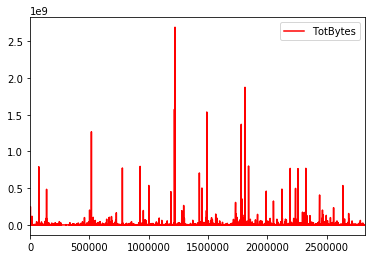

In [10]:
import matplotlib.pyplot as plt

dataset.plot(kind='line', y='TotBytes', color='red')


plt.show()

In [19]:
print(dataset.shape[0])

2824636
